In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive


In [ ]:
inpath='/content/gdrive/My Drive/Brain'
output_path='/content/gdrive/My Drive'

In [ ]:
from sklearn.model_selection import train_test_split
import numpy as np
Fully1='/content/gdrive/My Drive/Brain/Volumesf1.npy'

Under1='/content/gdrive/My Drive/Brain/VolumesUnderf1.npy'

Fully2='/content/gdrive/My Drive/Brain/Volumesf2.npy'

Under2='/content/gdrive/My Drive/Brain/VolumesUnderf2.npy'

Fully3='/content/gdrive/My Drive/Brain/Volumesf3.npy'

Under3='/content/gdrive/My Drive/Brain/VolumesUnderf3.npy'

Fully4='/content/gdrive/My Drive/Brain/Volumesf4.npy'

Under4='/content/gdrive/My Drive/Brain/VolumesUnderf4.npy'

FullyS1=np.load(Fully1)
FullyS2=np.load(Fully2)
FullyS3=np.load(Fully3)
FullyS4=np.load(Fully4)
UnderS1=np.load(Under1)
UnderS2=np.load(Under2)
UnderS3=np.load(Under3)
UnderS4=np.load(Under4)

#UnderS3=np.load(Under3)
#Fully_Sampled= np.asarray(FullyS1)
#Undersampled= np.asarray(UnderS1)
Fully_Sampled=np.asarray( np.concatenate((FullyS1,FullyS1,FullyS1,FullyS1),axis=0))
Undersampled=np.asarray(np.concatenate((UnderS1,UnderS2,UnderS3,UnderS4),axis=0))

#from sklearn.model_selection import train_test_split
undersampled_train,undersampled_test,vol_val_train,vol_val_test = train_test_split(Undersampled,Fully_Sampled, test_size=0.2, random_state=0)
  
undersampled_train=undersampled_train.reshape(64,4,128,128,20)
undersampled_train=undersampled_train[:,:,:,:,0:1]
undersampled_train=undersampled_train.reshape(64,4,128,128)
def split(data):
  hf=[]
  LF=[]
  for ima in data:
    c1,c2,c3,c4= np.array_split(ima, 4,axis=0)
    lf=c2,c3,c4
    hf.append(np.asarray(c1))
    hf=np.asarray(hf)
    LF.append(np.asarray(lf))
    lf=np.asarray(LF)
  return hf,lf
#undersampled_trainhf,undersampled_trainlf=split(undersampled_train)
hf=[]
LF=[]
for ima in undersampled_train:
    c1,c2,c3,c4= np.array_split(ima, 4,axis=0)
    lf=np.concatenate((c2,c3,c4),axis=0)
    hf.append(np.asarray(c1))
    #hf=c1
    hf=np.asarray(hf)
    LF.append(np.asarray(lf))
    LF=np.asarray(LF)
undersampled_trainhf,undersampled_trainlf=hf,LF

  
  
vol_val_train=vol_val_train.reshape(64,4,128,128,20)
vol_val_train=vol_val_train[:,:,:,:,0:1]
vol_val_train=vol_val_train.reshape(64,4,128,128)
#vol_val_trainhf,vol_val_trainlf=split(vol_val_train)
undersampled_test=undersampled_test.reshape(16,4,128,128,20)
undersampled_test=undersampled_test[:,:,:,:,0:1]
undersampled_test=undersampled_test.reshape(16,4,128,128)
#undersampled_testhf,undersampled_testlf=split(undersampled_test)
vol_val_test=vol_val_test.reshape(16,4,128,128,20)
vol_val_test=vol_val_test[:,:,:,:,0:1]
vol_val_test=vol_val_test.reshape(16,4,128,128)
#vol_val_testhf,vol_val_testlf=split(vol_val_test)
print(undersampled_trainhf.shape)
print(undersampled_trainlf.shape)







In [ ]:
from keras.layers import Input, Dense, Conv2D, MaxPooling2D, UpSampling2D,Dropout,SpatialDropout2D
from keras.models import Model
from keras import backend as K
from keras import regularizers
from keras.optimizers import Adam
#adam=optimizers.Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999, amsgrad=False)
input_img = Input(shape=(128, 128,4))  # adapt this if using `channels_first` image data format

x = Conv2D(16, (3, 3), activation='relu', padding='same',activity_regularizer=regularizers.l1(10e-9))(input_img)
x = Conv2D(64, (3, 3), activation='relu', padding='same',activity_regularizer=regularizers.l1(10e-9))(x)
#x = Dropout(0.4)(x)
x=SpatialDropout2D(0.5)(x)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(16, (3, 3), activation='relu', padding='same',activity_regularizer=regularizers.l1(10e-9))(x)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(8, (3, 3), activation='relu', padding='same',activity_regularizer=regularizers.l1(10e-9))(x)
x=SpatialDropout2D(0.5)(x)
encoded = MaxPooling2D((2, 2), padding='same')(x)

# at this point the representation is (4, 4, 8) i.e. 128-dimensional

x = Conv2D(8, (3, 3), activation='relu', padding='same',activity_regularizer=regularizers.l1(10e-9))(encoded)
x = UpSampling2D((2, 2))(x)
x = Conv2D(16, (3, 3), activation='relu', padding='same',activity_regularizer=regularizers.l1(10e-9))(x)
x = UpSampling2D((2, 2))(x)
x = Conv2D(64, (3, 3), activation='relu',padding='same',activity_regularizer=regularizers.l1(10e-9))(x)
#x = Dropout(0.4)(x)
x=SpatialDropout2D(0.5)(x)
x = UpSampling2D((2, 2))(x)
x= Conv2D(16, (5, 5), activation='relu',padding='same',activity_regularizer=regularizers.l1(10e-9))(x)
decoded = Conv2D(4, (1, 1), activation='linear', padding='valid',activity_regularizer=regularizers.l1(10e-9))(x)

autoencoder = Model(input_img, decoded)
autoencoder.compile(optimizer=Adam(lr=0.001), loss='mse')
#SGD(lr=0.1, momentum=0.8, decay=lr/400, nesterov=False)
undersampled_train = np.reshape(undersampled_train, (len(undersampled_train), 128, 128,4))  # adapt this if using `channels_first` image data format
undersampled_test = np.reshape(undersampled_test, (len(undersampled_test), 128, 128,4))  # adapt this if using `channels_first` image data format
vol_val_train = np.reshape(vol_val_train, (len(vol_val_train), 128, 128,4))  # adapt this if using `channels_first` image data format
vol_val_test = np.reshape(vol_val_test, (len(vol_val_test), 128, 128,4))

Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [ ]:
from keras.callbacks import TensorBoard

autoencoder.fit(undersampled_train, vol_val_train,
                epochs=1,
                batch_size=1,
                shuffle=True,
                validation_data=(undersampled_test, vol_val_test))
#                callbacks=[TensorBoard(log_dir='/content/gdrive/My Drive/autoencoder')])

Train on 64 samples, validate on 16 samples
Epoch 1/400
64/64 [==============================] - 20s 308ms/step - loss: 0.0097 - val_loss: 0.0077
Epoch 2/400
64/64 [==============================] - 19s 293ms/step - loss: 0.0082 - val_loss: 0.0058
Epoch 3/400
64/64 [==============================] - 18s 284ms/step - loss: 0.0079 - val_loss: 0.0062
Epoch 4/400
64/64 [==============================] - 18s 286ms/step - loss: 0.0075 - val_loss: 0.0065
Epoch 5/400
64/64 [==============================] - 18s 288ms/step - loss: 0.0069 - val_loss: 0.0066
Epoch 6/400
64/64 [==============================] - 19s 289ms/step - loss: 0.0072 - val_loss: 0.0052
Epoch 7/400
64/64 [==============================] - 19s 291ms/step - loss: 0.0066 - val_loss: 0.0044
Epoch 8/400
64/64 [==============================] - 18s 289ms/step - loss: 0.0056 - val_loss: 0.0044
Epoch 9/400
64/64 [==============================] - 18s 288ms/step - loss: 0.0056 - val_loss: 0.0048
Epoch 10/400
64/64 [==================

In [ ]:
autoencoder.summary()

Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 128, 128, 4)       0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 128, 128, 16)      592       
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 128, 128, 64)      9280      
_________________________________________________________________
spatial_dropout2d_1 (Spatial (None, 128, 128, 64)      0         
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 64, 64, 64)        0         
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 64, 64, 16)        9232      
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 32, 32, 16)        0   

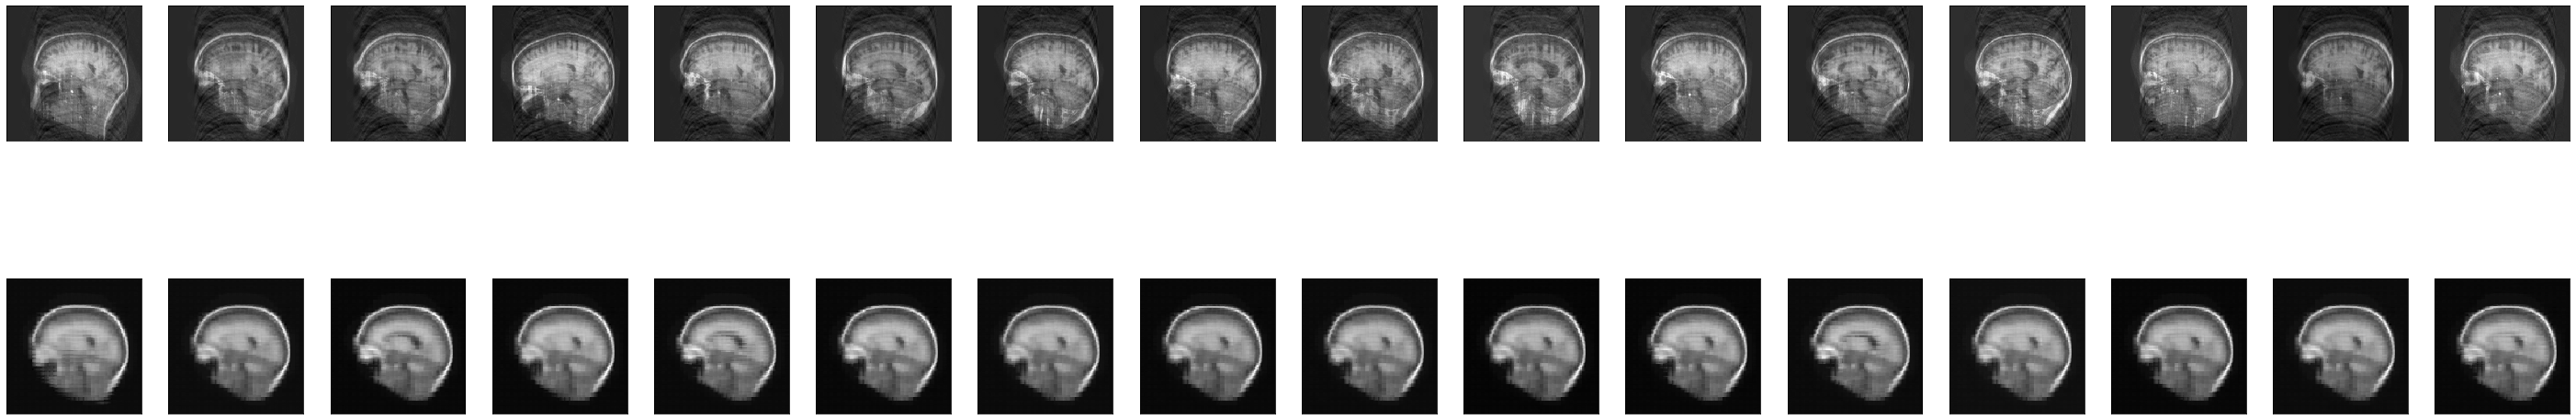

In [ ]:
import matplotlib.pyplot as plt
import pywt
decoded_imgs = autoencoder.predict(undersampled_test)

def idwav(imgs):
    imagepred=[]
    for imagef in imgs:
        imagef=imagef.reshape(4,128,128)
        c1,c2,c3,c4= np.array_split(imagef, 4,axis=0)
    
    #ca,cd=np.dsplit(imagef, 2)
        coeffs1=c1,(c2,c3,c4)
        imageff=pywt.idwt2(coeffs1, 'haar')
        #print(np.shape(imageff))
        imageff=imageff.reshape(256,256)
        imagepred.append(imageff)
    imagepred=np.asarray(imagepred,dtype=np.float64)
    return imagepred
  
undersampled_test_input=idwav(undersampled_test)
imagepred=idwav(decoded_imgs)



n = 16
plt.figure(figsize=(50, 10))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i+1)
    plt.imshow(undersampled_test_input[i])##################printing test input
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, n, i +n+1)
    plt.imshow(imagepred[i].reshape(256, 256))#######################printing prediction
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

In [ ]:
original_images=idwav(vol_val_test)#######fully test images


from skimage.measure import compare_ssim as ssim

for im1,im2 in zip(original_images,imagepred):
    ssim_const = ssim(im1,im2)
                
    print(ssim_const)
      

0.8374703516177195
0.8774116057453551
0.8524873567976591
0.8150112579607556
0.8603912485491906
0.8314788599366436
0.8703922656399954
0.8212644881073086
0.8203674211381892
0.8642667778665957
0.8227194944703013
0.8797961711666237
0.8362099242134309
0.8728504424808782
0.8734163773586172
0.8607519679083473
